In [37]:
import random
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import ds2s_OV

In [38]:
L = 10.0
K = 30
n_0 = 10
x_0 = 0.1
v_0 = 0.2
dt = 1.0
dx = 1.0
x_init = np.array([(2 * i) / 10 for i in range(30)])
n_max = 500

In [39]:
model = ds2s_OV.ds2s_OV(
	L=L,
	K=K,
	n_0=n_0,
	x_0=x_0,
	v_0=v_0,
	dt=dt,
	dx=dx,
	x_init=x_init,
	n_max=n_max
)

In [40]:
model.simulate()

In [41]:
x = np.array([[j for i in range(K)] for j in range(n_max + 1)]) \
    .flatten()
y = model.x[:, :K].flatten()

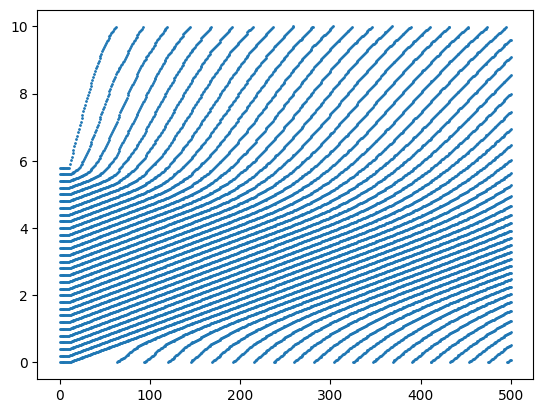

In [42]:
plt.scatter(x, y, s=1)
plt.show()